In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima
import seaborn as sns

In [66]:
df = pd.read_csv('adani.csv')

In [67]:
df.head()

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,7-September-2021,94.65,96.00,93.10,93.10,93.348581,638173,10278,59572544.0,638173.0,100.0,2.90,-1.55
1,6-September-2021,98.00,102.00,98.00,98.00,98.522598,1190343,16010,117275685.0,1190343.0,100.0,4.00,0.00
2,3-September-2021,113.40,113.50,103.15,103.15,105.669282,3126487,32611,330373637.0,3126487.0,100.0,10.35,-10.25
3,2-September-2021,108.55,108.55,107.05,108.55,108.529121,1019385,4467,110632958.0,1019385.0,100.0,1.50,0.00
4,1-September-2021,102.00,103.40,100.50,103.40,103.080813,921700,6167,95009585.0,921700.0,100.0,2.90,1.40


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2647 entries, 0 to 2646
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       2647 non-null   object 
 1   Open Price                 2647 non-null   float64
 2   High Price                 2647 non-null   float64
 3   Low Price                  2647 non-null   float64
 4   Close Price                2647 non-null   float64
 5   WAP                        2647 non-null   float64
 6   No.of Shares               2647 non-null   int64  
 7   No. of Trades              2647 non-null   int64  
 8   Total Turnover (Rs.)       2647 non-null   float64
 9   Deliverable Quantity       2646 non-null   float64
 10  % Deli. Qty to Traded Qty  2646 non-null   float64
 11  Spread High-Low            2647 non-null   float64
 12  Spread Close-Open          2647 non-null   float64
dtypes: float64(10), int64(2), object(1)
memory usage

<AxesSubplot:>

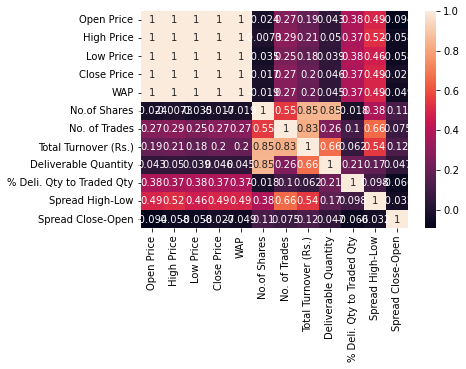

In [69]:
corr = df.corr()
sns.heatmap(corr,annot= True,)

In [70]:
df.isnull().sum()

Date                         0
Open Price                   0
High Price                   0
Low Price                    0
Close Price                  0
WAP                          0
No.of Shares                 0
No. of Trades                0
Total Turnover (Rs.)         0
Deliverable Quantity         1
% Deli. Qty to Traded Qty    1
Spread High-Low              0
Spread Close-Open            0
dtype: int64

In [71]:
df = df.dropna(how='any',axis=0) 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2646 entries, 0 to 2646
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       2646 non-null   object 
 1   Open Price                 2646 non-null   float64
 2   High Price                 2646 non-null   float64
 3   Low Price                  2646 non-null   float64
 4   Close Price                2646 non-null   float64
 5   WAP                        2646 non-null   float64
 6   No.of Shares               2646 non-null   int64  
 7   No. of Trades              2646 non-null   int64  
 8   Total Turnover (Rs.)       2646 non-null   float64
 9   Deliverable Quantity       2646 non-null   float64
 10  % Deli. Qty to Traded Qty  2646 non-null   float64
 11  Spread High-Low            2646 non-null   float64
 12  Spread Close-Open          2646 non-null   float64
dtypes: float64(10), int64(2), object(1)
memory usage

In [72]:
df['Date']= pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)

In [73]:
df.head()

,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
Date,,,,,,,,,,,,
2021-09-07,94.65,96.00,93.10,93.10,93.348581,638173,10278,59572544.0,638173.0,100.0,2.90,-1.55
2021-09-06,98.00,102.00,98.00,98.00,98.522598,1190343,16010,117275685.0,1190343.0,100.0,4.00,0.00
2021-09-03,113.40,113.50,103.15,103.15,105.669282,3126487,32611,330373637.0,3126487.0,100.0,10.35,-10.25
2021-09-02,108.55,108.55,107.05,108.55,108.529121,1019385,4467,110632958.0,1019385.0,100.0,1.50,0.00
2021-09-01,102.00,103.40,100.50,103.40,103.080813,921700,6167,95009585.0,921700.0,100.0,2.90,1.40


Plotting Weekly Stock Closing Price

<AxesSubplot:xlabel='Date'>

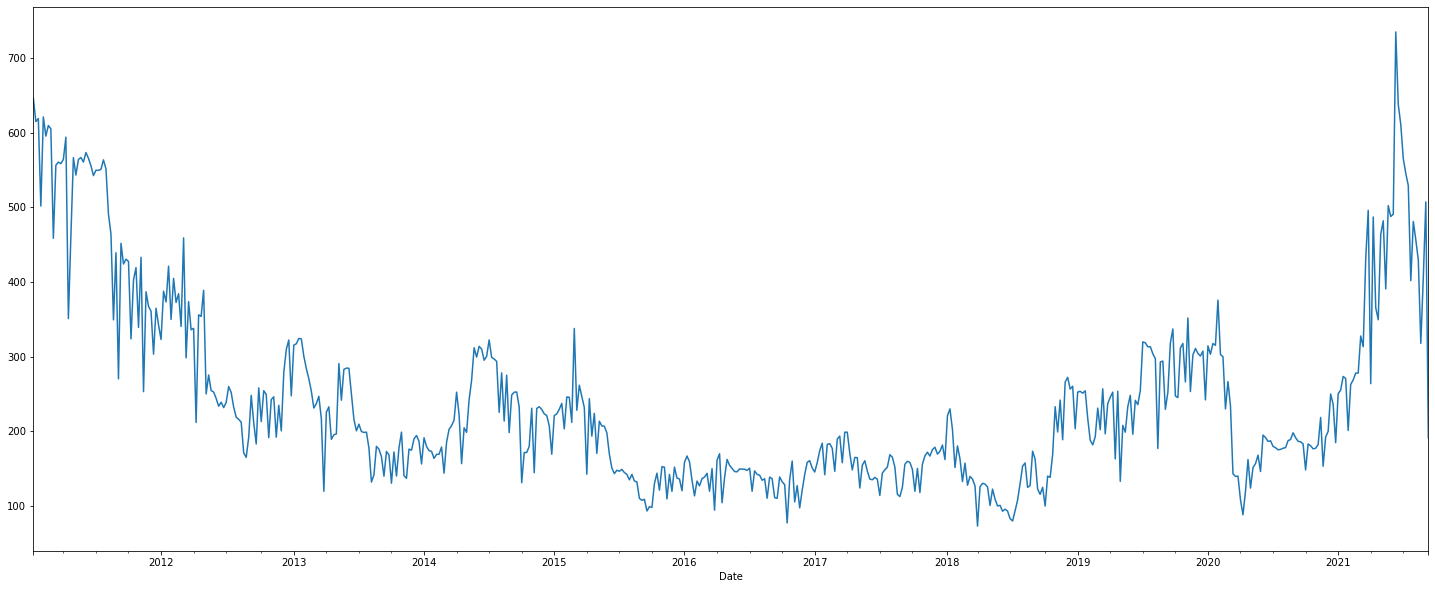

In [74]:
df['Close Price'].resample(rule='W').sum().plot(figsize=(25,10))

Plotting Monthly Stock Closing Price

<AxesSubplot:xlabel='Date'>

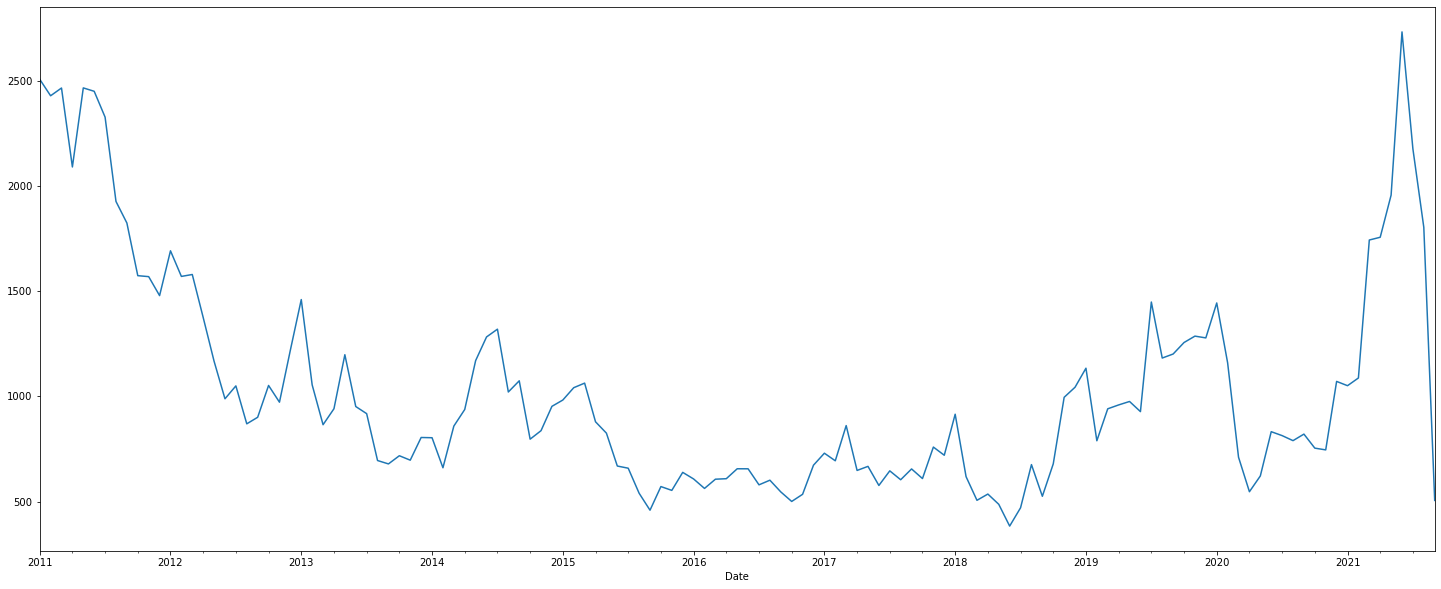

In [75]:
df['Close Price'].resample(rule='M').sum().plot(figsize=(25,10))

Plotting Quarterly Stock Closing Price

<AxesSubplot:xlabel='Date'>

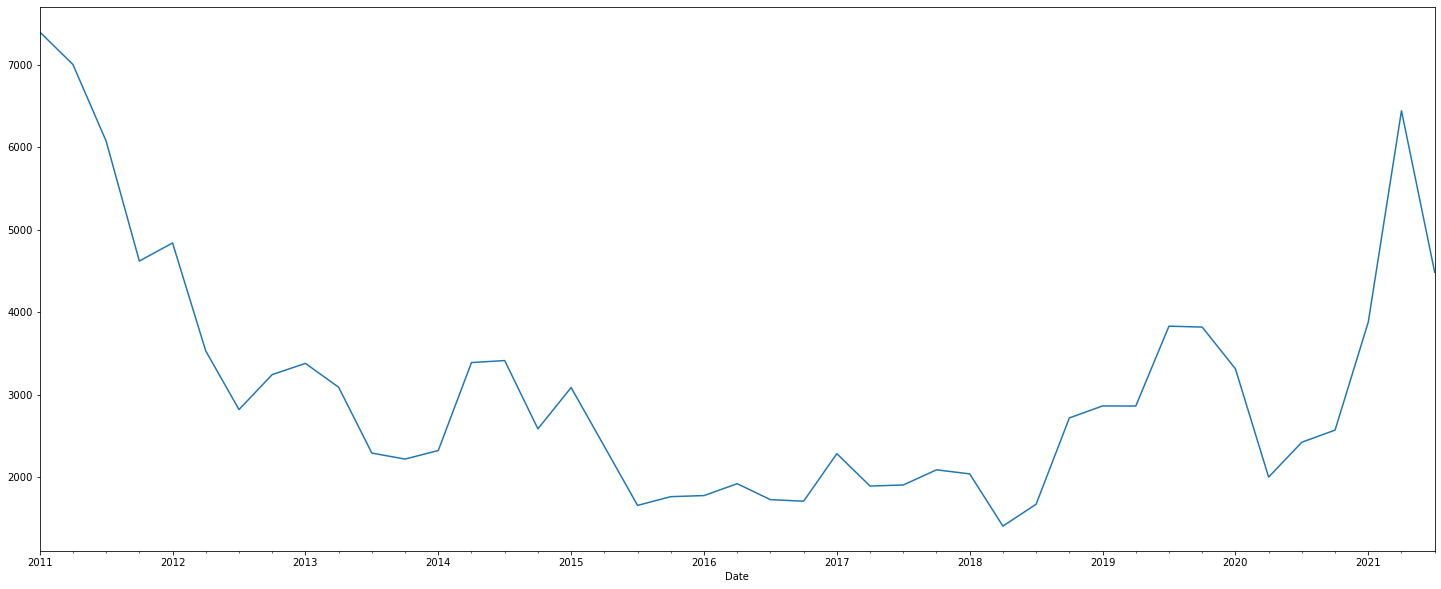

In [76]:
df['Close Price'].resample(rule='Q').sum().plot(figsize=(25,10))

In [77]:
df_close_price = pd.DataFrame()
df_close_price = df.drop(df.iloc[:,0:3],axis=1)
df_close_price = df_close_price.drop(df_close_price.iloc[:,1:11],axis=1)


In [78]:
df_close_price.head()

,Close Price
Date,
2021-09-07,93.10
2021-09-06,98.00
2021-09-03,103.15
2021-09-02,108.55
2021-09-01,103.40


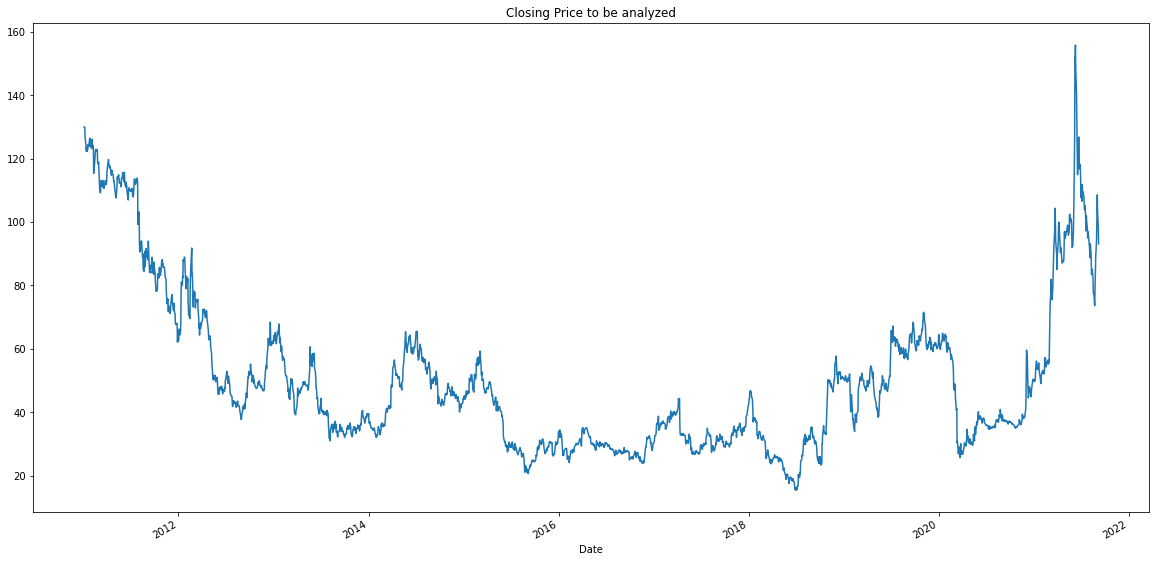

In [79]:
df_close_price['Close Price'].plot(figsize=(20,10))
plt.title('Closing Price to be analyzed')
plt.show()

Resampling in the Monthly form

In [80]:
df_day = df_close_price.resample('1D').interpolate()
df_day.head()

,Close Price
Date,
2011-01-03,129.95
2011-01-04,130.00
2011-01-05,129.90
2011-01-06,129.85
2011-01-07,126.85


<AxesSubplot:>

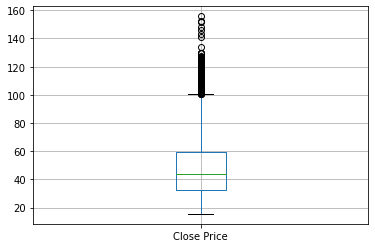

In [81]:
df_day.boxplot(column='Close Price')

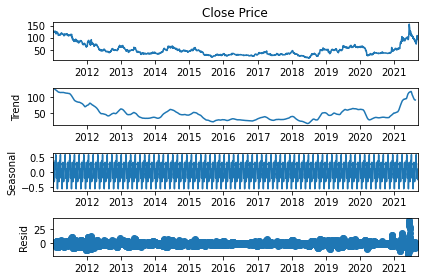

In [82]:
season = seasonal_decompose(df_day['Close Price'],period=50)
season.plot();

In [83]:
# Defining the adfuller test function
from statsmodels.tsa.stattools import adfuller

def adf_test(series):

    print(f'Augumented Dickey-Fuller Test: Adani Power Stock Forecast')
    result = adfuller(series.dropna(),autolag='AIC')
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'Critical Valu ({key})'] = val
    
    print(out.to_string())

    if result[1]<=0.05:                     # Considering 5 percent significant value
        print("Reject NULL Hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Failed to reject NULL Hypothesis")
        print("Data has unit root and is non-stationary")

In [84]:
adf_test(df_day['Close Price'])

Augumented Dickey-Fuller Test: Adani Power Stock Forecast
ADF test statistic       -2.820823
p-value                   0.055360
# lags used              30.000000
# observations         3870.000000
Critical Valu (1%)       -3.432041
Critical Valu (5%)       -2.862287
Critical Valu (10%)      -2.567168
Failed to reject NULL Hypothesis
Data has unit root and is non-stationary


In [ ]:
from statsmodels.tsa.statespace.tools import diff

df_day['Close Price'] = diff(df_day['Close Price'],k_diff=1)
df_day['Close Price'].plot(title="First Difference Data").autoscale(axis='x',tight=True)

In [85]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_day, test_size=0.2,random_state=5)

In [86]:
train.head()

,Close Price
Date,
2014-11-26,46.150000
2013-08-04,32.033333
2021-01-04,50.200000
2020-10-20,35.450000
2020-08-01,35.316667


In [87]:
auto_arima(train['Close Price'].dropna(),seasonal=True,m=7).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 3120
Model:                        SARIMAX   Log Likelihood              -14415.400
Date:                Wed, 08 Sep 2021   AIC                          28834.800
Time:                        21:06:31   BIC                          28846.891
Sample:                             0   HQIC                         28839.140
                               - 3120                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     50.0069      0.672     74.362      0.000      48.689      51.325
sigma2       603.5108     17.661     34.171      0.000     568.895     638.126
===================================================================================
Ljung-Box (L1) (Q):                   1.62   Jarque-Bera (JB):              1334.00
Prob(Q):                              0.20   Prob(JB):                         0.00
Heteroskedasticity (H):               0.98   Skew:                             1.42
Prob(H) (two-sided):                  0.73   Kurtosis:                         4.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [88]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
result = SARIMAX(df_day['Close Price'], order=(1, 1, 1),seasonal_order=(1,1,1,12) ).fit(maxiter=5000)

In [89]:
start = len(train)
end   = len(train)+len(test)-1

In [90]:
prediction = result.predict(start,end).rename('SARIMA Prediction')

<AxesSubplot:xlabel='Date'>

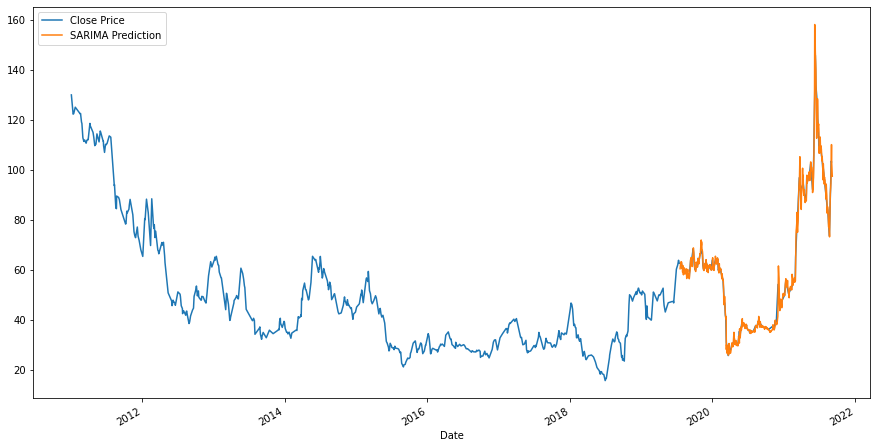

In [91]:
test['Close Price'].plot(figsize =(15,8),legend=True)
prediction.plot(legend=True)

In [92]:
test['Close Price'].mean()
test.info()
test.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 781 entries, 2011-08-19 to 2011-03-12
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Close Price  781 non-null    float64
dtypes: float64(1)
memory usage: 12.2 KB


,Close Price
Date,
2011-08-19,84.700000
2018-03-16,27.350000
2017-02-12,36.416667
2011-03-20,110.650000
2012-10-29,47.800000


In [93]:
from statsmodels.tools.eval_measures import rmse
rmse(test['Close Price'],prediction)

36.38308205922403

In [101]:
result = SARIMAX(df_day['Close Price'].dropna(),order=(1,1,4),seasonal_order=(1,1,1,12),
                                           enforce_invertibility=False).fit()
forecast = result.predict(len(df_day),len(df_day)+100).rename('SARIMA Forecast')



<AxesSubplot:xlabel='Dates', ylabel='Close Price'>

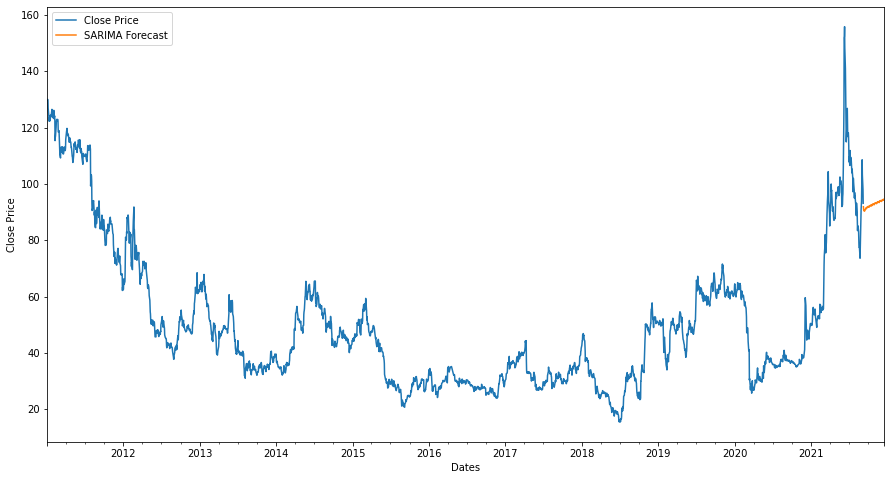

In [102]:
title = "Adani Forecast"
xlabel = "Dates"
ylabel = "Close Price"
ax =df_day['Close Price'].plot(legend = True, figsize=(15,8))
ax.autoscale(axis='x',tight = True)
ax.set(xlabel=xlabel ,ylabel=ylabel)
forecast.plot(legend=True)

In [103]:
forecast.to_csv('prediction.csv')